# Exploratory Data Analysis

@Jorge de Leon 

This code uses several data outputs produced during the data ingestion, storage and wrangling to do an exploratory data analysis of the data. 

In [1]:
#Set up
import os
os.chdir("..")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
from string import ascii_letters
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

## Files for analysis

In [2]:
#import base file 
#Stock data 
stock_data = pd.read_csv('constructed\\capstone\\master_finance_save.csv')

#Residuals
final_dataset = pd.read_csv('constructed\\capstone\\final_dataset.csv')

### Stock prices for the Biotechnology Industry and S&P500 

In [3]:
stock_data['ticker'].unique()

array(['ALXN', 'AMGN', 'BIIB', 'GILD', 'INCY', 'REGN', 'VRTX'],
      dtype=object)

In [4]:
#Create dataframe for each stock
df_sp500 = stock_data[stock_data['ticker'] == 'ALXN']
df_sp500 = df_sp500[['datetime', 'sp500']]

#Create dataframe only with relevant variables
stock_data_wide = stock_data[['datetime','ticker','price']]

#Transform from long to wide dataframe
stock_data_wide=stock_data_wide.pivot(index='datetime', columns='ticker', values='price')

#Reset index
stock_data_wide = stock_data_wide.reset_index()

In [5]:
#Merge with sp500
stock_data_wide = pd.merge(stock_data_wide, df_sp500, how='left', on = 'datetime') 

In [6]:
#Generate data column 
stock_data_wide['datetime'] = pd.to_datetime(stock_data_wide['datetime'])
stock_data_wide = stock_data_wide.set_index('datetime') 

In [7]:
stock_data_wide.head(3)

ALXN       AMGN       BIIB       GILD   INCY       REGN  \
datetime                                                                   
2010-01-04  24.125000  57.720001  53.639999  21.650000   9.50  24.629999   
2010-01-05  23.780001  57.220001  53.380001  21.629999  10.27  25.100000   
2010-01-06  23.840000  56.790001  53.430000  22.379999  11.00  24.719999   

                 VRTX        sp500  
datetime                            
2010-01-04  44.240002  1867.060059  
2010-01-05  42.779999  1872.900024  
2010-01-06  42.029999  1874.729980

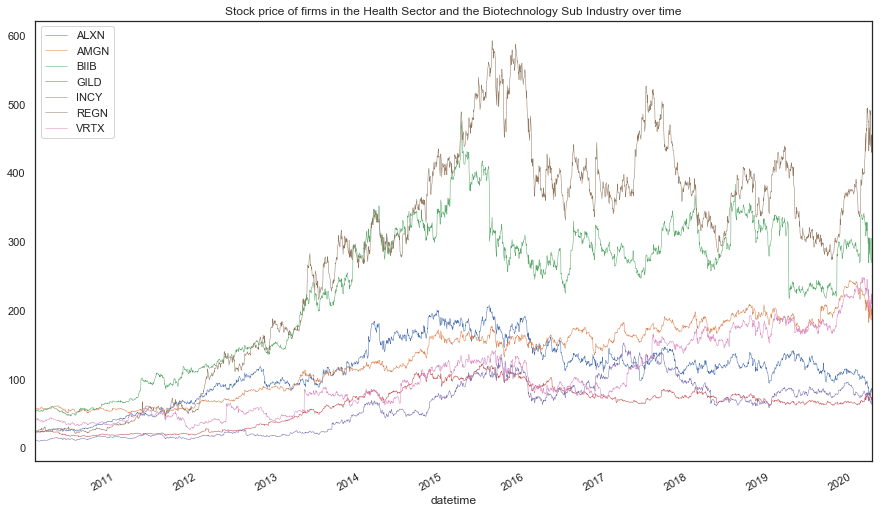

In [8]:
##Stock prices
stock_data_wide[['ALXN','AMGN','BIIB',
               'GILD','INCY','REGN','VRTX']].plot(linewidth=0.5, figsize=(15, 9),
                                                title="Stock price of firms in the Health Sector and the Biotechnology Sub Industry over time")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB365578C8>,
      dtype=object)

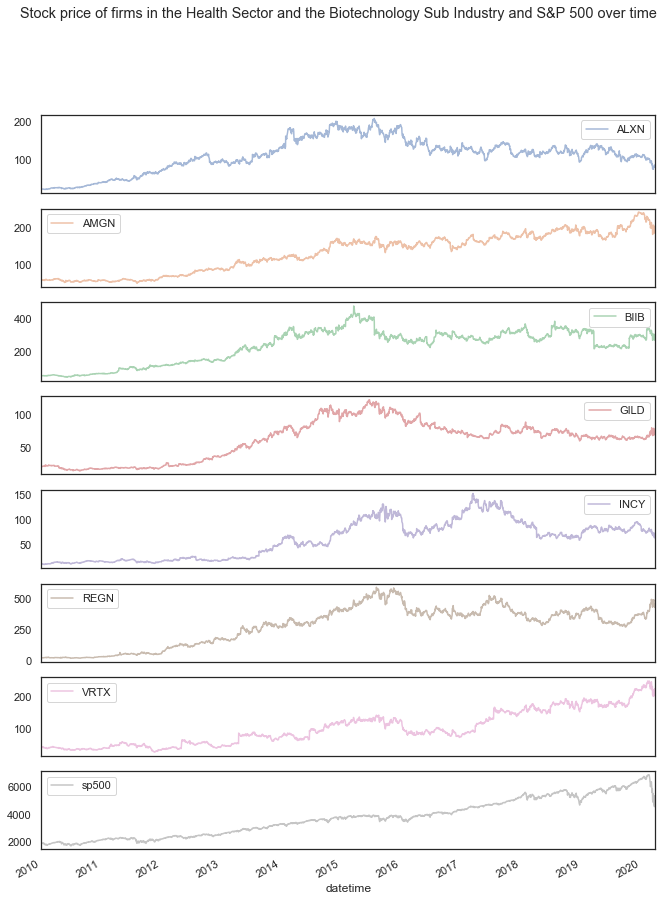

In [9]:
#Subplots for each firm and S&P 500 Index
stock_data_wide.plot(subplots=True, figsize=(11,15),
                    alpha = 0.5, 
                    title="Stock price of firms in the Health Sector and the Biotechnology Sub Industry and S&P 500 over time")

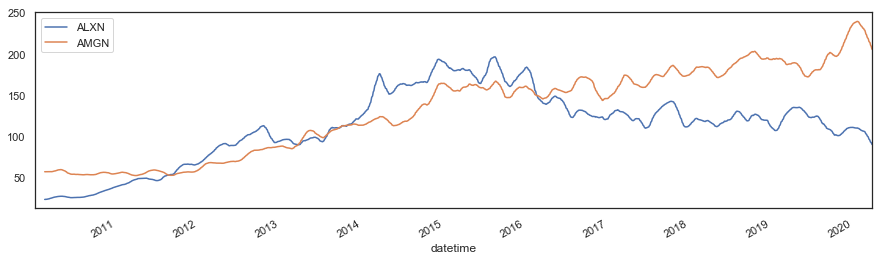

In [10]:
#Creating 30-day rolling average charts for ALXN and AMGN
stock_data_wide[['ALXN', 'AMGN']].rolling(30).mean().plot(figsize=(15,4))

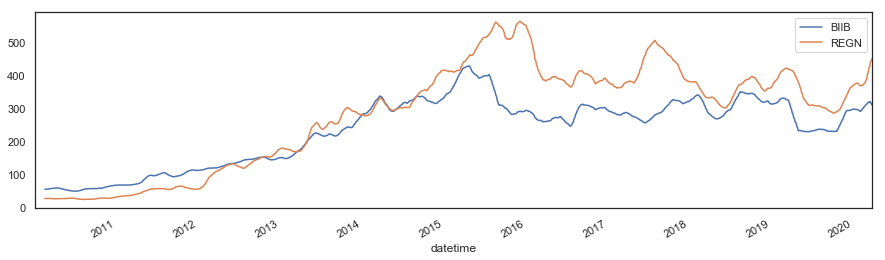

In [11]:
#Creating 30-day rolling average charts for BIIB and RGN
stock_data_wide[['BIIB','REGN']].rolling(30).mean().plot(figsize=(15,4))

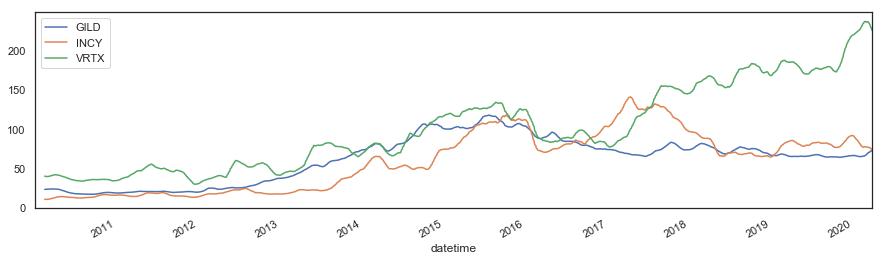

In [12]:
#Creating 30-day rolling average charts for GILD, INCY and VRTX
stock_data_wide[['GILD', 'INCY','VRTX']].rolling(30).mean().plot(figsize=(15,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB36926588>,
      dtype=object)

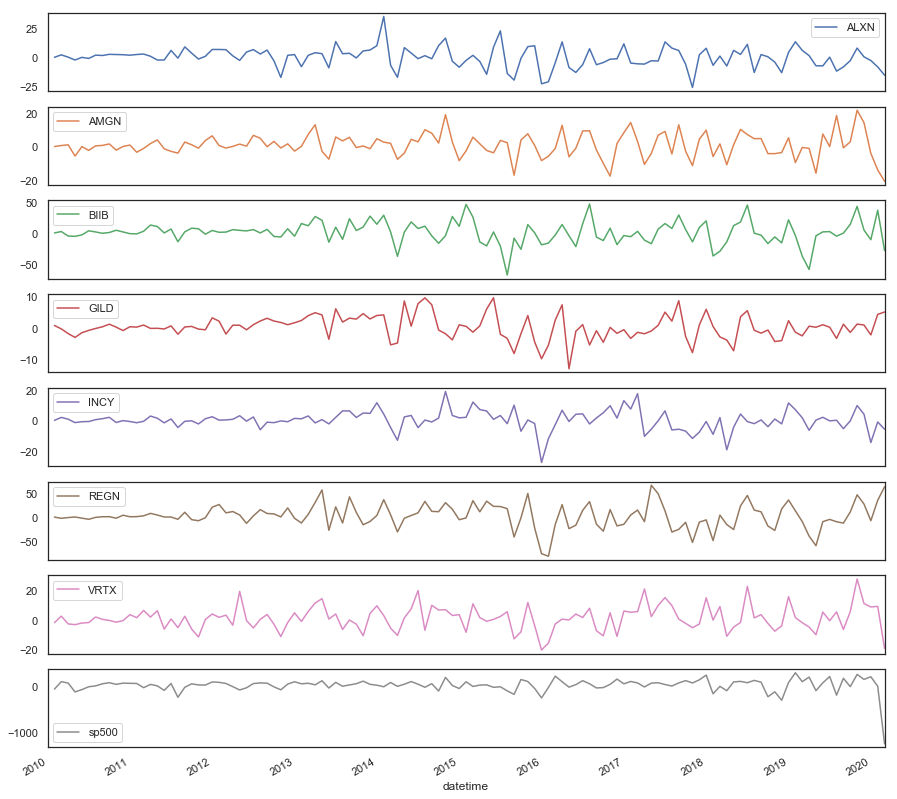

In [13]:
#Create chart that resamples by taking the average of the price of the days of the month and creates a monthly value
#Then it takes the difference relative to the previous month
stock_data_wide.resample("1m").mean().diff().plot(subplots=True, figsize=(15,15))

This preliminary findings shows that there might be a correlation between the series, given the different measures we can create a new dataframe that compares these time series in logs

In [14]:
stock_data_wide_log = stock_data_wide.resample('1M').mean()

In [15]:
for column in stock_data_wide_log.columns:
    try:
        stock_data_wide_log[column] = np.log(stock_data_wide_log[column])
    except (ValueError, AttributeError):
        pass

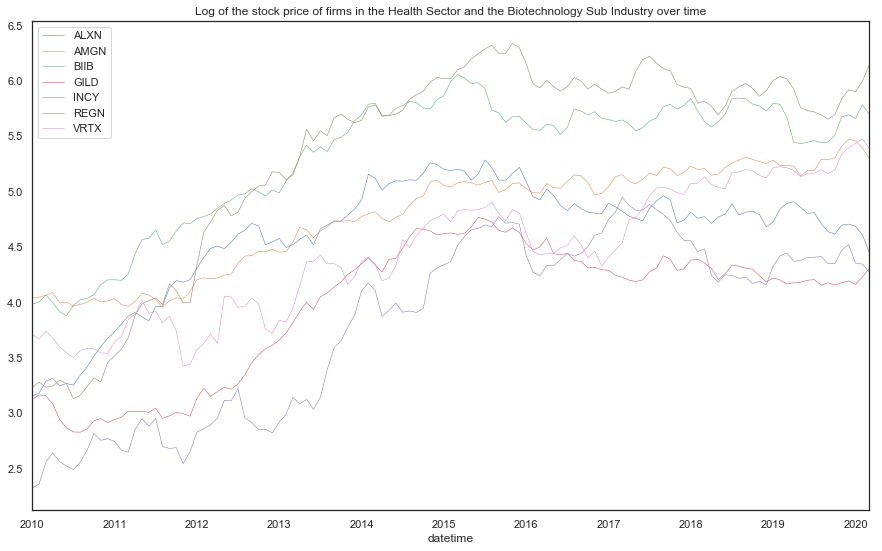

In [16]:
stock_data_wide_log[['ALXN','AMGN','BIIB',
               'GILD','INCY','REGN','VRTX']].plot(linewidth=0.5, figsize=(15, 9),
                                                title="Log of the stock price of firms in the Health Sector and the Biotechnology Sub Industry over time")

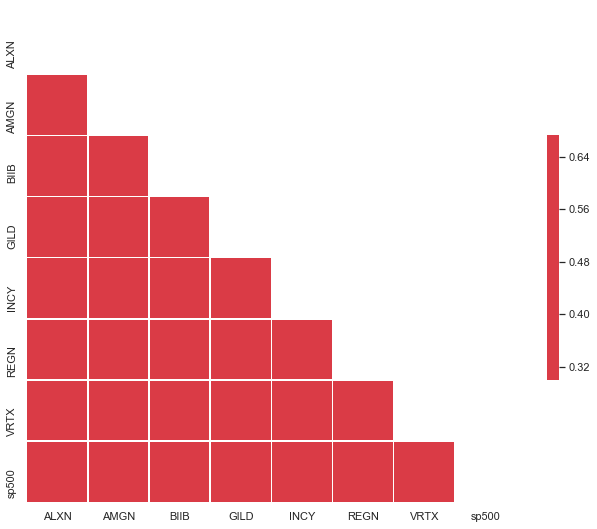

In [17]:
# Compute the correlation matrix
corr = stock_data_wide_log.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
#Print the correlation matrix, 
#The log of the stock prices are highly positively correlated with S&P 500 and other log prices 
corr.head(10)

ALXN      AMGN      BIIB      GILD      INCY      REGN      VRTX  \
ALXN   1.000000  0.787318  0.943237  0.892495  0.796701  0.943794  0.672678   
AMGN   0.787318  1.000000  0.907796  0.899982  0.930731  0.918789  0.944411   
BIIB   0.943237  0.907796  1.000000  0.947262  0.883452  0.977078  0.817890   
GILD   0.892495  0.899982  0.947262  1.000000  0.897325  0.945237  0.796037   
INCY   0.796701  0.930731  0.883452  0.897325  1.000000  0.899583  0.861082   
REGN   0.943794  0.918789  0.977078  0.945237  0.899583  1.000000  0.821051   
VRTX   0.672678  0.944411  0.817890  0.796037  0.861082  0.821051  1.000000   
sp500  0.691425  0.966430  0.832508  0.792520  0.886661  0.837845  0.959433   

          sp500  
ALXN   0.691425  
AMGN   0.966430  
BIIB   0.832508  
GILD   0.792520  
INCY   0.886661  
REGN   0.837845  
VRTX   0.959433  
sp500  1.000000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB38568948>,
      dtype=object)

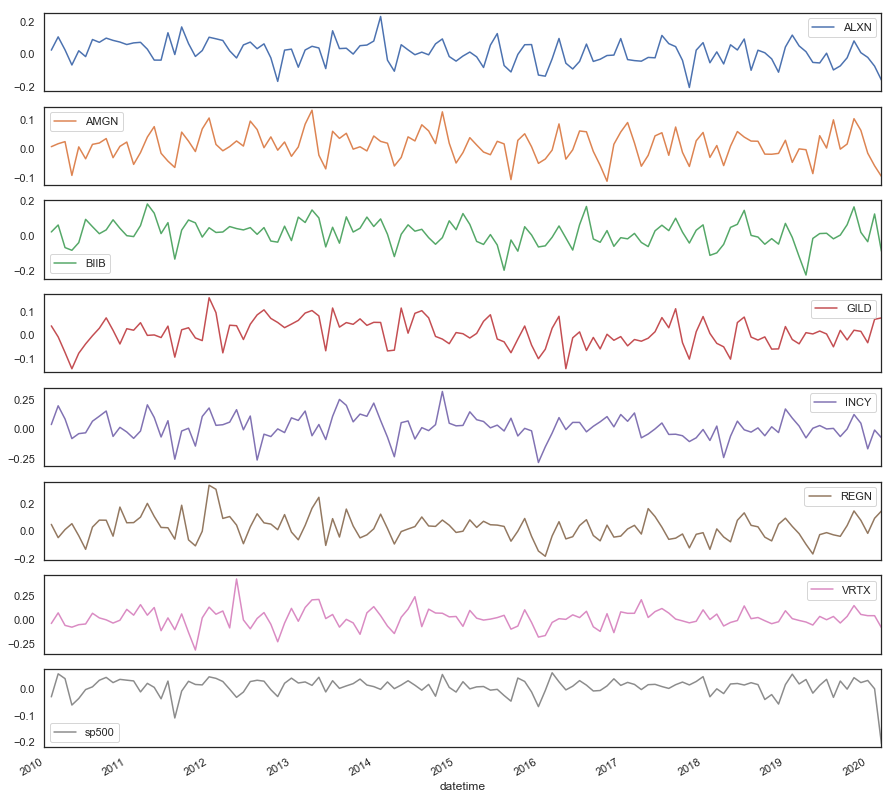

In [19]:
#Print the diff chart for each of the lines
stock_data_wide_log.diff().plot(subplots=True, figsize=(15,15))

In [20]:
#The correlation is much smaller when looking at the difference
stock_data_wide_log.diff().corr()

ALXN      AMGN      BIIB      GILD      INCY      REGN      VRTX  \
ALXN   1.000000  0.423381  0.402579  0.396748  0.396576  0.403933  0.346190   
AMGN   0.423381  1.000000  0.380636  0.398793  0.408568  0.416995  0.343465   
BIIB   0.402579  0.380636  1.000000  0.405330  0.360715  0.382913  0.315184   
GILD   0.396748  0.398793  0.405330  1.000000  0.296510  0.477074  0.326145   
INCY   0.396576  0.408568  0.360715  0.296510  1.000000  0.336274  0.345153   
REGN   0.403933  0.416995  0.382913  0.477074  0.336274  1.000000  0.450444   
VRTX   0.346190  0.343465  0.315184  0.326145  0.345153  0.450444  1.000000   
sp500  0.441642  0.421185  0.345229  0.257387  0.332986  0.160666  0.232509   

          sp500  
ALXN   0.441642  
AMGN   0.421185  
BIIB   0.345229  
GILD   0.257387  
INCY   0.332986  
REGN   0.160666  
VRTX   0.232509  
sp500  1.000000

## Residual Analysis

In [21]:
#Residuals
final_dataset.head(10)

ticker  year  month  mthly_ave_resid  sec_pos_words  sec_neg_words  \
0   ALXN  2010      5        -0.000227         8188.0        15322.0   
1   ALXN  2010      6         0.002119          533.0         1340.0   
2   ALXN  2010      7        -0.000597        11536.0        19706.0   
3   ALXN  2010      8         0.002623          124.0          410.0   
4   ALXN  2010      9         0.001101         1492.0         2433.0   
5   ALXN  2010     10        -0.000905         1227.0         2606.0   
6   ALXN  2010     11         0.003088         9400.0        16357.0   
7   ALXN  2010     12        -0.002932            0.0            0.0   
8   ALXN  2011      1        -0.001500           86.0          348.0   
9   ALXN  2011      2         0.003633        24968.0        42237.0   

   mthly_filing_count  gs_poswords  gs_negwords        date  ...  \
0                 2.0          0.0          0.0  2010-05-01  ...   
1                 1.0          0.0          0.0  2010-06-01  ...   
2                 2.0          0.0          0.0  2010-07-01  ...   
3                 1.0          0.0          0.0  2010-08-01  ...   
4                 1.0          0.0          0.0  2010-09-01  ...   
5                 1.0          0.0          0.0  2010-10-01  ...   
6                 1.0          0.0          0.0  2010-11-01  ...   
7                 0.0          0.0          0.0  2010-12-01  ...   
8                 1.0          0.0          0.0  2011-01-01  ...   
9                 5.0          0.0          0.0  2011-02-01  ...   

   polarity_biotec  subjectivity_biotec  count_word_stock_biotec  \
0         0.046268             0.427437                      0.0   
1         0.089781             0.429822                      1.0   
2         0.047497             0.435121                      0.0   
3         0.048077             0.392828                      0.0   
4         0.094201             0.423588                      1.0   
5         0.110001             0.422038                      1.0   
6         0.113347             0.412433                      1.0   
7         0.058448             0.423596                      0.0   
8         0.115417             0.458510                      2.5   
9         0.114323             0.427462                     10.5   

   total_words_biotec  no_articles_biotec  polarity_pharma  \
0         1254.000000                 4.0         0.079035   
1         5822.750000                12.0         0.087463   
2         1916.500000                 6.0         0.105340   
3         1034.000000                 3.0         0.091100   
4         1671.500000                 4.0         0.076276   
5         4256.666667                12.0         0.077382   
6         4230.000000                 6.0         0.079961   
7         6040.500000                 6.0         0.080840   
8         6960.000000                 7.0         0.083305   
9         3105.000000                 8.0         0.109325   

   subjectivity_pharma  count_word_stock_pharma  total_words_pharma  \
0             0.408581                 5.833333         8637.666667   
1             0.428858                11.666667         7323.500000   
2             0.446044                 2.000000         9667.333333   
3             0.434501                 1.500000         7016.500000   
4             0.400516                 2.000000         6921.500000   
5             0.425507                 1.250000        11399.276190   
6             0.437958                 2.050000         8914.450000   
7             0.428329                 3.583333        12260.250000   
8             0.421162                 5.500000         9258.666667   
9             0.434675                 2.500000         6794.266667   

   no_articles_pharma  
0                  21  
1                  19  
2                  21  
3                  21  
4                  22  
5                  49  
6                  33  
7                  43  
8                  30  
9     

In [22]:
final_dataset.columns

Index(['ticker', 'year', 'month', 'mthly_ave_resid', 'sec_pos_words',
       'sec_neg_words', 'mthly_filing_count', 'gs_poswords', 'gs_negwords',
       'date', 'goo_trends_value', 'polarity', 'subjectivity',
       'count_word_stock', 'total_words', 'no_articles', 'polarity_biotec',
       'subjectivity_biotec', 'count_word_stock_biotec', 'total_words_biotec',
       'no_articles_biotec', 'polarity_pharma', 'subjectivity_pharma',
       'count_word_stock_pharma', 'total_words_pharma', 'no_articles_pharma'],
      dtype='object')

### Contemporaneous correlations between the log residuals stock prices

In [23]:
#Create dataframe only with relevant variables
residuals_data_wide = final_dataset[['date','ticker','mthly_ave_resid']]
#Transform from long to wide dataframe
residuals_data_wide = residuals_data_wide.pivot(index='date', columns='ticker', values='mthly_ave_resid')

#Reset index
residuals_data_wide = residuals_data_wide.reset_index()

In [24]:
#Generate data column 
residuals_data_wide['date'] = pd.to_datetime(residuals_data_wide['date'])
residuals_data_wide = residuals_data_wide.set_index('date') 

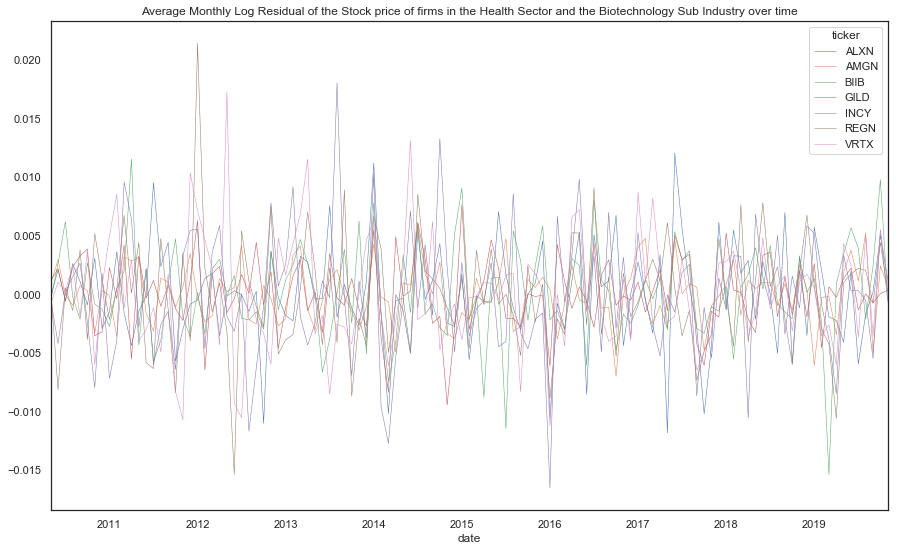

In [25]:
residuals_data_wide.plot(linewidth=0.5, figsize=(15, 9),
                                                title="Average Monthly Log Residual of the Stock price of firms in the Health Sector and the Biotechnology Sub Industry over time")

In [26]:
#Correlogram - positive correlated with each other (contemporaneous correlation)
residuals_data_wide.corr()

ticker      ALXN      AMGN      BIIB      GILD      INCY      REGN      VRTX
ticker                                                                      
ALXN    1.000000  0.202077  0.213593  0.416328  0.134460  0.228845  0.225256
AMGN    0.202077  1.000000  0.175244  0.226552  0.241082  0.237492  0.172605
BIIB    0.213593  0.175244  1.000000  0.223581  0.283365  0.224779  0.148013
GILD    0.416328  0.226552  0.223581  1.000000  0.237224  0.267581  0.132134
INCY    0.134460  0.241082  0.283365  0.237224  1.000000  0.328579  0.255387
REGN    0.228845  0.237492  0.224779  0.267581  0.328579  1.000000  0.236334
VRTX    0.225256  0.172605  0.148013  0.132134  0.255387  0.236334  1.000000

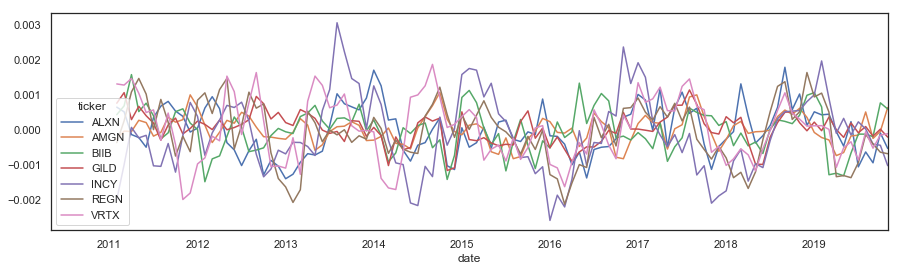

In [27]:
residuals_data_wide.rolling(10).mean().plot(figsize=(15,4))

### Autocorrelation

This section analyzes if the time series are correlated with historic values

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


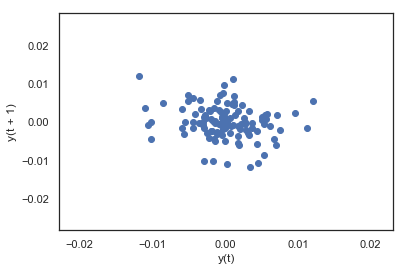

In [28]:
#ALXN: Plot residual
lag_plot(residuals_data_wide['ALXN'])
plt.show()

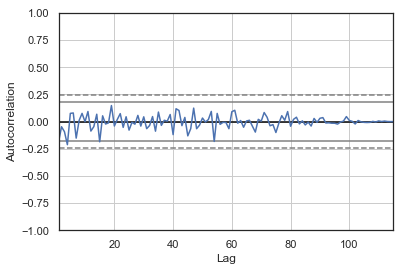

In [29]:
autocorrelation_plot(residuals_data_wide['ALXN'])
plt.show()

#We failed to reject the null hypothesis that there is no autocorrelation 
#at and beyond a given lag is rejected at a significance level of α. This is evidence for the presence of a random walk

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


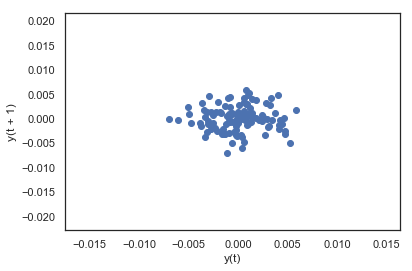

In [30]:
#AMGN: Plot residual
lag_plot(residuals_data_wide['AMGN'])
plt.show()

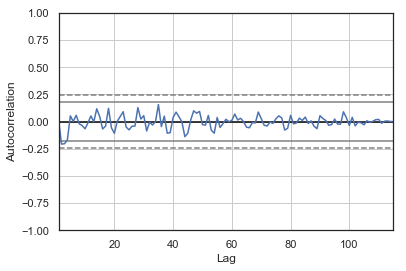

In [31]:
autocorrelation_plot(residuals_data_wide['AMGN'])
plt.show()

#We failed to reject the null hypothesis that there is no autocorrelation 
#at and beyond a given lag is rejected at a significance level of α. This is evidence for the presence of a random walk

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


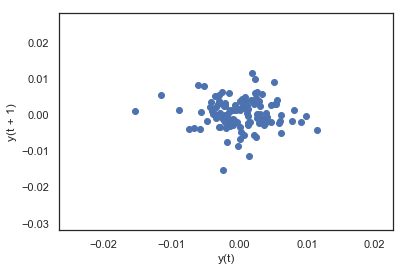

In [32]:
#BIIB: Plot residual
lag_plot(residuals_data_wide['BIIB'])
plt.show()

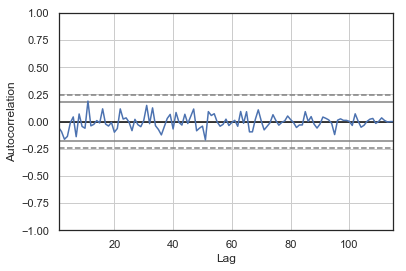

In [33]:
autocorrelation_plot(residuals_data_wide['BIIB'])
plt.show()

#We failed to reject the null hypothesis that there is no autocorrelation 
#at and beyond a given lag is rejected at a significance level of α. This is evidence for the presence of a random walk

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


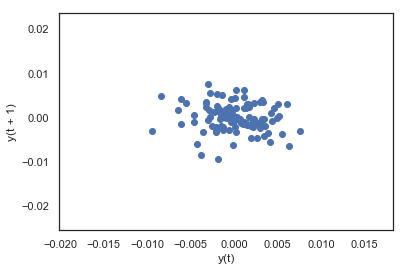

In [34]:
#GILD: Plot residual
lag_plot(residuals_data_wide['GILD'])
plt.show()

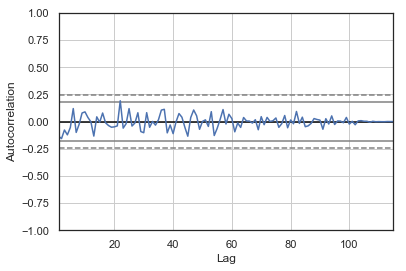

In [35]:
autocorrelation_plot(residuals_data_wide['GILD'])
plt.show()

#We failed to reject the null hypothesis that there is no autocorrelation 
#at and beyond a given lag is rejected at a significance level of α. This is evidence for the presence of a random walk

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


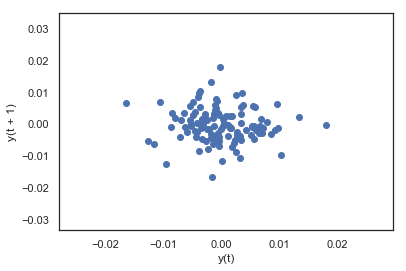

In [36]:
#INCY: Plot residual
lag_plot(residuals_data_wide['INCY'])
plt.show()

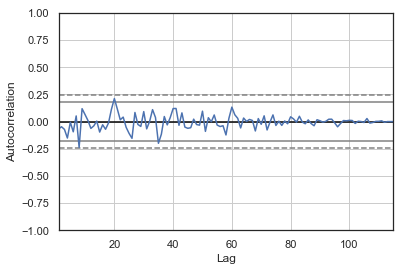

In [37]:
autocorrelation_plot(residuals_data_wide['INCY'])
plt.show()

#We failed to reject the null hypothesis that there is no autocorrelation 
#at and beyond a given lag is rejected at a significance level of α. This is evidence for the presence of a random walk

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


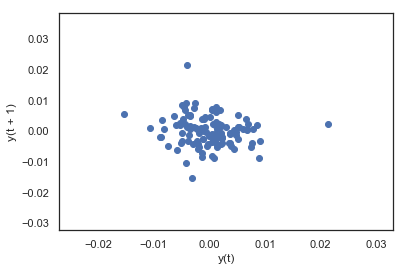

In [38]:
#REGN: Plot residual
lag_plot(residuals_data_wide['REGN'])
plt.show()

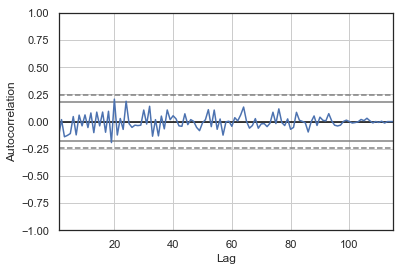

In [39]:
autocorrelation_plot(residuals_data_wide['REGN'])
plt.show()

#We failed to reject the null hypothesis that there is no autocorrelation 
#at and beyond a given lag is rejected at a significance level of α. This is evidence for the presence of a random walk

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


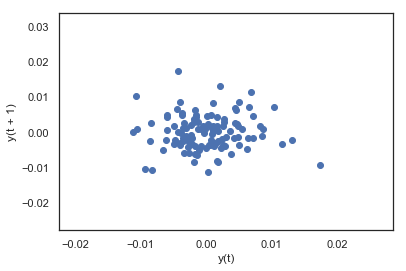

In [40]:
#VRTX: Plot residual
lag_plot(residuals_data_wide['VRTX'])
plt.show()

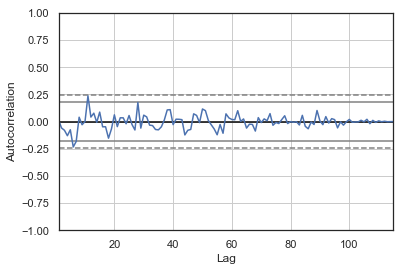

In [41]:
autocorrelation_plot(residuals_data_wide['VRTX'])
plt.show()

#We failed to reject the null hypothesis that there is no autocorrelation 
#at and beyond a given lag is rejected at a significance level of α. This is evidence for the presence of a random walk

### Is there predictive power in the lag values of other variables?

In [42]:
#Generate residuals 
residuals_data_wide['alxn_l'] =  residuals_data_wide['ALXN'].shift(1)
residuals_data_wide['amgn_l'] =  residuals_data_wide['AMGN'].shift(1)
residuals_data_wide['biib_l'] =  residuals_data_wide['BIIB'].shift(1)
residuals_data_wide['gild_l'] =  residuals_data_wide['GILD'].shift(1)
residuals_data_wide['incy_l'] =  residuals_data_wide['INCY'].shift(1)
residuals_data_wide['regn_l'] =  residuals_data_wide['REGN'].shift(1)
residuals_data_wide['vrtx_l'] =  residuals_data_wide['VRTX'].shift(1)

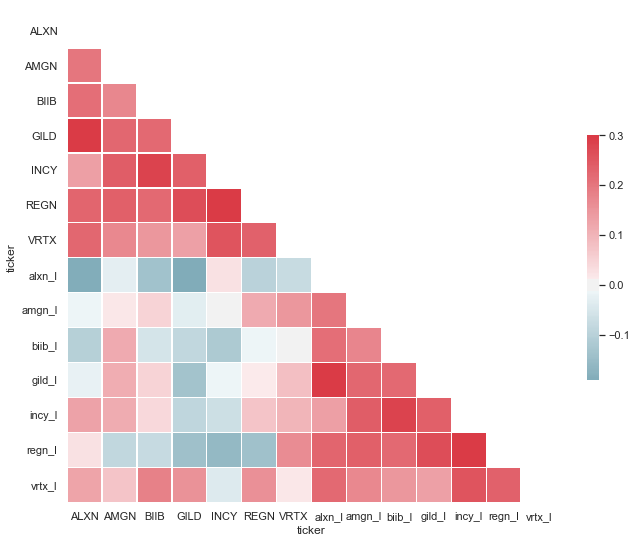

In [43]:
# Compute the correlation matrix
corr = residuals_data_wide.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

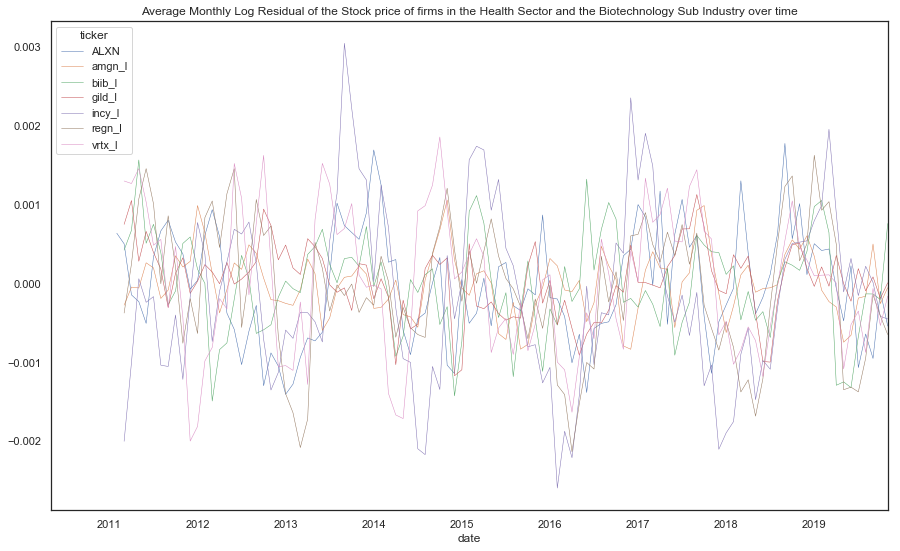

In [44]:
residuals_data_wide[['ALXN','amgn_l','biib_l','gild_l','incy_l','regn_l','vrtx_l']].rolling(10).mean().plot(
    linewidth=0.5, figsize=(15, 9),
    title="Average Monthly Log Residual of the Stock price of firms in the Health Sector and the Biotechnology Sub Industry over time")

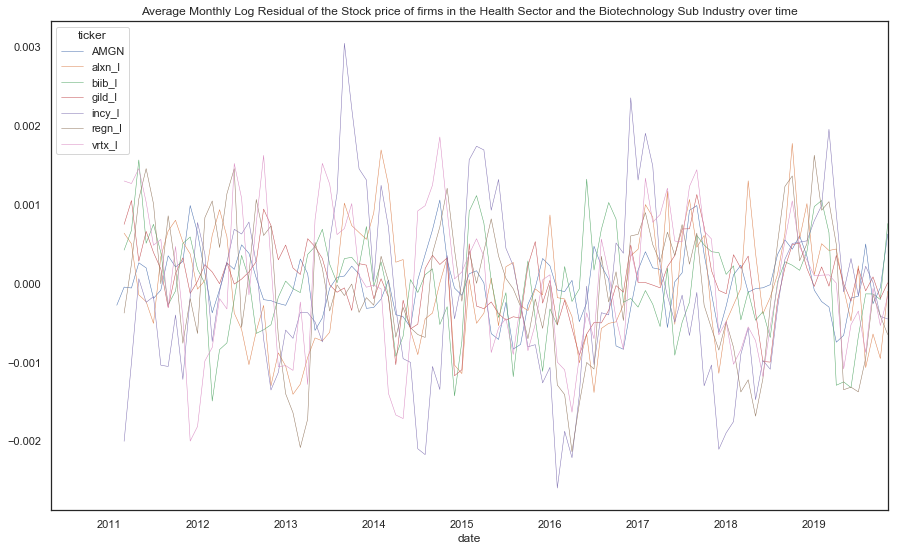

In [45]:
residuals_data_wide[['AMGN','alxn_l','biib_l','gild_l','incy_l','regn_l','vrtx_l']].rolling(10).mean().plot(
    linewidth=0.5, figsize=(15, 9),
    title="Average Monthly Log Residual of the Stock price of firms in the Health Sector and the Biotechnology Sub Industry over time")

### Relationship with Events features

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB3A8C3EC8>,
      dtype=object)

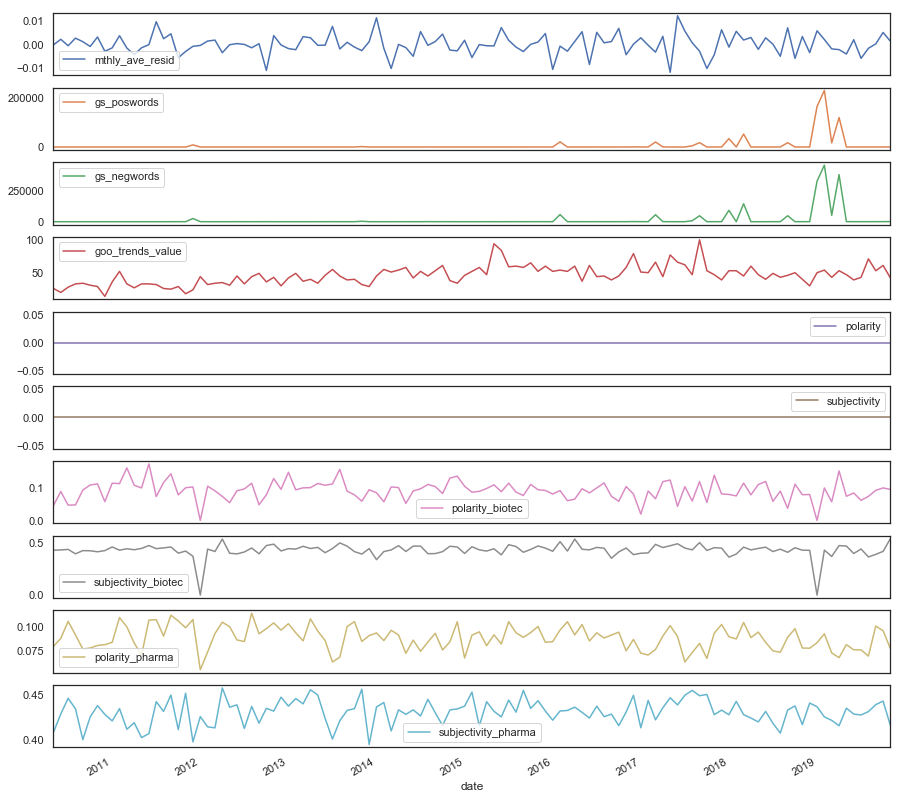

In [46]:
#ALXN 
alxn_dataset = final_dataset[final_dataset['ticker'] == 'ALXN']
alxn_dataset = alxn_dataset[['date','ticker','mthly_ave_resid', 'gs_poswords', 'gs_negwords', 'goo_trends_value',
                 'polarity', 'subjectivity','polarity_biotec','subjectivity_biotec', 
                 'polarity_pharma', 'subjectivity_pharma']]
alxn_dataset['date'] = pd.to_datetime(alxn_dataset['date'])
alxn_dataset = alxn_dataset.set_index('date') 

#plot for ALXN
alxn_dataset.plot(subplots=True, figsize=(15,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB3AB0CA48>,
      dtype=object)

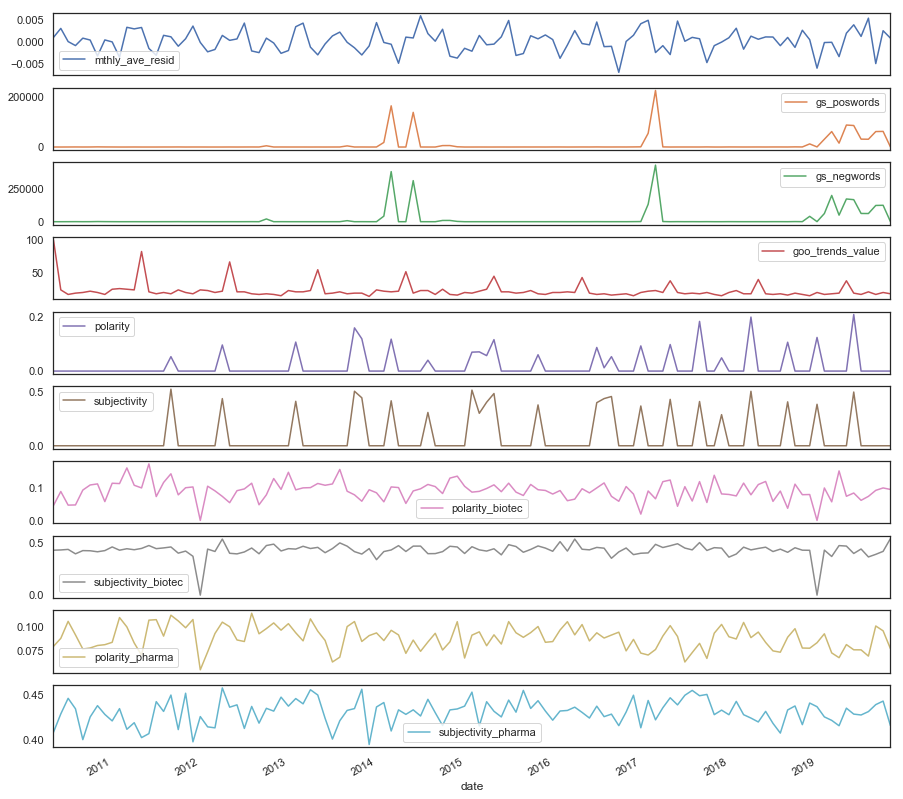

In [47]:
#AMGN 
amgn_dataset = final_dataset[final_dataset['ticker'] == 'AMGN']
amgn_dataset = amgn_dataset[['date','ticker','mthly_ave_resid', 'gs_poswords', 'gs_negwords', 'goo_trends_value',
                 'polarity', 'subjectivity','polarity_biotec','subjectivity_biotec', 
                 'polarity_pharma', 'subjectivity_pharma']]
amgn_dataset['date'] = pd.to_datetime(amgn_dataset['date'])
amgn_dataset = amgn_dataset.set_index('date') 

#plot for ALXN
amgn_dataset.plot(subplots=True, figsize=(15,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB38249048>,
      dtype=object)

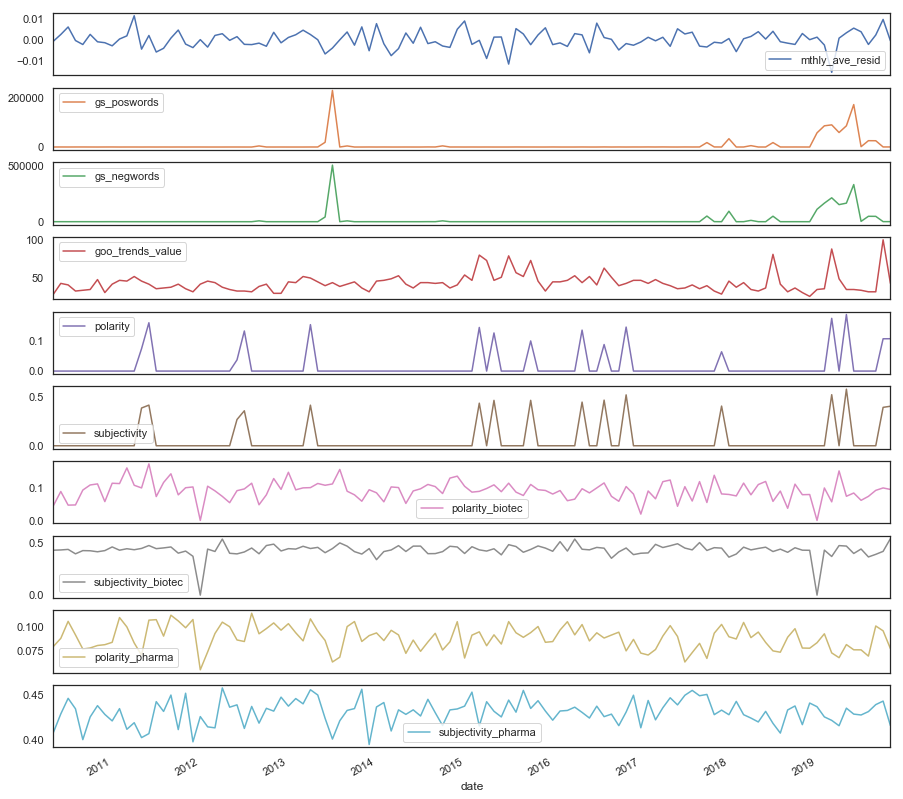

In [50]:
#BIIB
biib_dataset = final_dataset[final_dataset['ticker'] == 'BIIB']
biib_dataset = biib_dataset[['date','ticker','mthly_ave_resid', 'gs_poswords', 'gs_negwords', 'goo_trends_value',
                 'polarity', 'subjectivity','polarity_biotec','subjectivity_biotec', 
                 'polarity_pharma', 'subjectivity_pharma']]
biib_dataset['date'] = pd.to_datetime(biib_dataset['date'])
biib_dataset = biib_dataset.set_index('date') 

#plot for BIIB
biib_dataset.plot(subplots=True, figsize=(15,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB3DF8E788>,
      dtype=object)

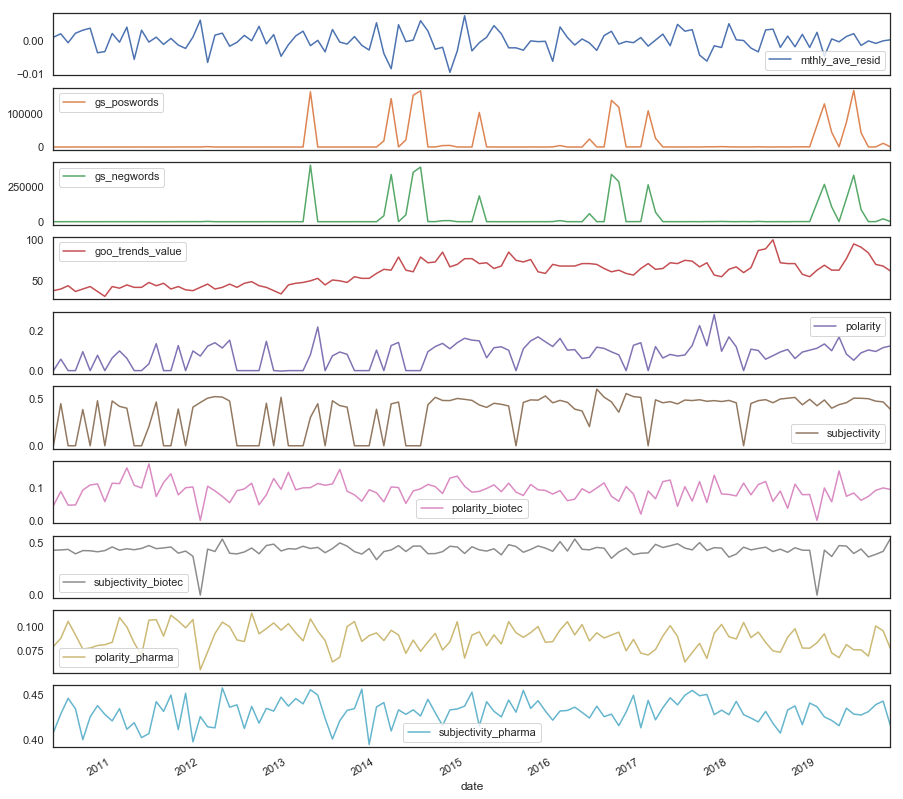

In [51]:
#GILD
gild_dataset = final_dataset[final_dataset['ticker'] == 'GILD']
gild_dataset = gild_dataset[['date','ticker','mthly_ave_resid', 'gs_poswords', 'gs_negwords', 'goo_trends_value',
                 'polarity', 'subjectivity','polarity_biotec','subjectivity_biotec', 
                 'polarity_pharma', 'subjectivity_pharma']]
gild_dataset['date'] = pd.to_datetime(gild_dataset['date'])
gild_dataset = gild_dataset.set_index('date') 

#plot for GILD
gild_dataset.plot(subplots=True, figsize=(15,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB3E8B8688>,
      dtype=object)

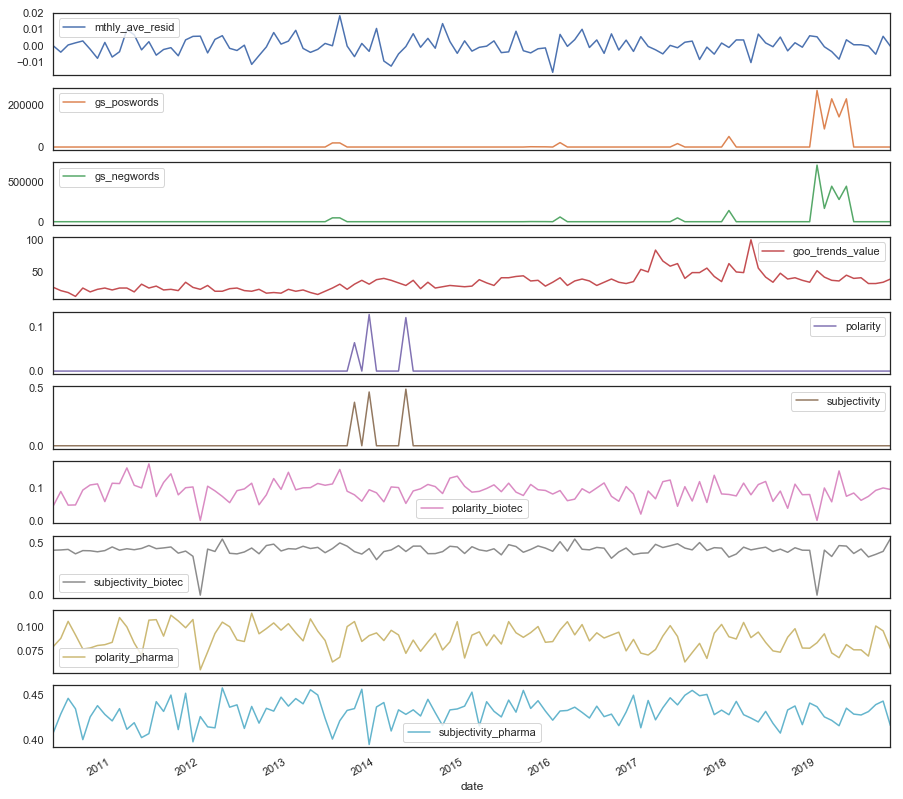

In [52]:
#INCY
incy_dataset = final_dataset[final_dataset['ticker'] == 'INCY']
incy_dataset = incy_dataset[['date','ticker','mthly_ave_resid', 'gs_poswords', 'gs_negwords', 'goo_trends_value',
                 'polarity', 'subjectivity','polarity_biotec','subjectivity_biotec', 
                 'polarity_pharma', 'subjectivity_pharma']]
incy_dataset['date'] = pd.to_datetime(incy_dataset['date'])
incy_dataset = incy_dataset.set_index('date') 

#plot for GILD
incy_dataset.plot(subplots=True, figsize=(15,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB401C5408>,
      dtype=object)

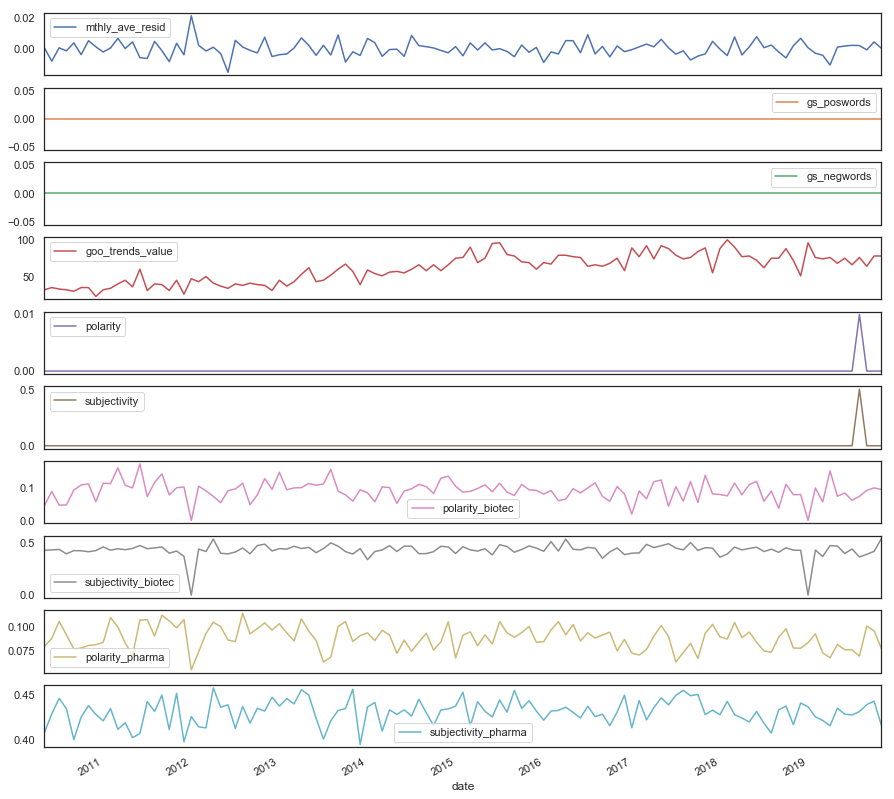

In [53]:
#REGN
regn_dataset = final_dataset[final_dataset['ticker'] == 'REGN']
regn_dataset = regn_dataset[['date','ticker','mthly_ave_resid', 'gs_poswords', 'gs_negwords', 'goo_trends_value',
                 'polarity', 'subjectivity','polarity_biotec','subjectivity_biotec', 
                 'polarity_pharma', 'subjectivity_pharma']]
regn_dataset['date'] = pd.to_datetime(regn_dataset['date'])
regn_dataset = regn_dataset.set_index('date') 

#plot for GILD
regn_dataset.plot(subplots=True, figsize=(15,15))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB40B13388>,
      dtype=object)

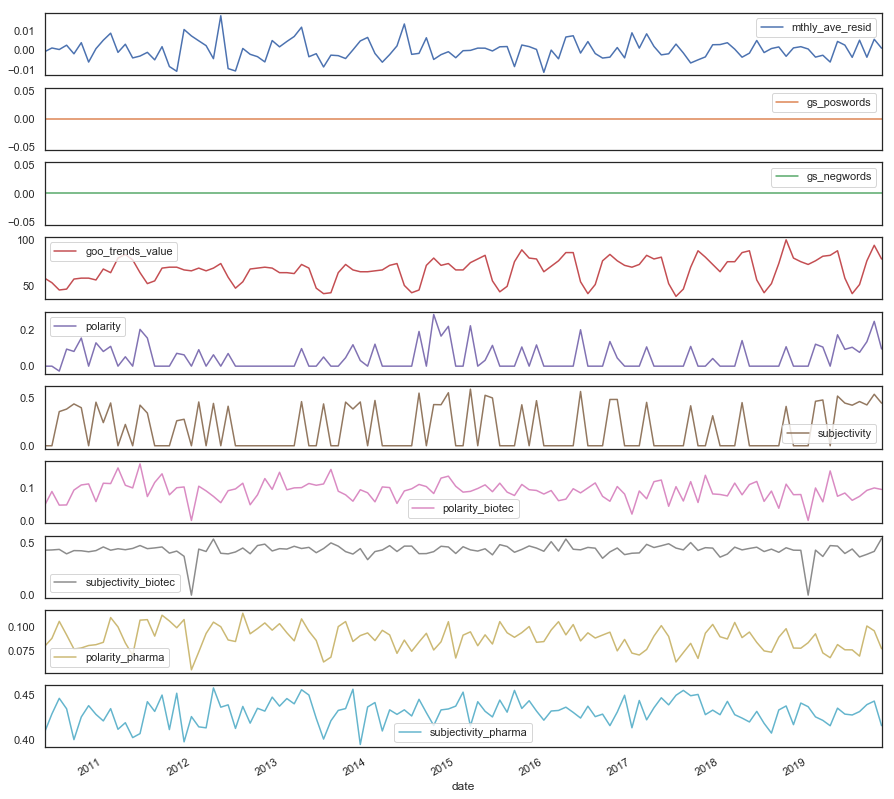

In [54]:
#VRTX
vrtx_dataset = final_dataset[final_dataset['ticker'] == 'VRTX']
vrtx_dataset = vrtx_dataset[['date','ticker','mthly_ave_resid', 'gs_poswords', 'gs_negwords', 'goo_trends_value',
                 'polarity', 'subjectivity','polarity_biotec','subjectivity_biotec', 
                 'polarity_pharma', 'subjectivity_pharma']]
vrtx_dataset['date'] = pd.to_datetime(vrtx_dataset['date'])
vrtx_dataset = vrtx_dataset.set_index('date') 

#plot for GILD
vrtx_dataset.plot(subplots=True, figsize=(15,15))